In [11]:
import warnings
warnings.filterwarnings('ignore') 

import pyproj
import geopandas as gpd
from shapely import geometry
import matplotlib.pyplot as plt

In [2]:
pyproj.CRS.from_user_input('+proj=tmerc +lat_0=0 +lon_0=108 +k=1 +x_0=500000 +y_0=0 +ellps=IAU76 +units=m +no_defs')

<Projected CRS: +proj=tmerc +lat_0=0 +lon_0=108 +k=1 +x_0=500000 + ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Transverse Mercator
Datum: Unknown based on IAU 1976 ellipsoid
- Ellipsoid: IAU 1976
- Prime Meridian: Greenwich

In [3]:
pyproj.CRS.from_user_input(2381)

<Projected CRS: EPSG:2381>
Name: Xian 1980 / 3-degree Gauss-Kruger CM 108E
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: China - 106.5°E to 109.5°E onshore
- bounds: (106.5, 18.19, 109.51, 42.47)
Coordinate Operation:
- name: 3-degree Gauss-Kruger CM 108E
- method: Transverse Mercator
Datum: Xian 1980
- Ellipsoid: IAG 1975
- Prime Meridian: Greenwich

In [4]:
pyproj.CRS.from_user_input('EPSG:2381')

<Projected CRS: EPSG:2381>
Name: Xian 1980 / 3-degree Gauss-Kruger CM 108E
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: China - 106.5°E to 109.5°E onshore
- bounds: (106.5, 18.19, 109.51, 42.47)
Coordinate Operation:
- name: 3-degree Gauss-Kruger CM 108E
- method: Transverse Mercator
Datum: Xian 1980
- Ellipsoid: IAG 1975
- Prime Meridian: Greenwich

In [5]:
pyproj.CRS.from_user_input(2381).to_proj4()

'+proj=tmerc +lat_0=0 +lon_0=108 +k=1 +x_0=500000 +y_0=0 +ellps=IAU76 +units=m +no_defs +type=crs'

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# 利用name字段选择中国区域
china = world.loc[world['name'].isin(['China', 'Taiwan']), 'geometry']
china

139    MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...
140    POLYGON ((121.77782 24.39427, 121.17563 22.790...
Name: geometry, dtype: geometry

In [8]:
china.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

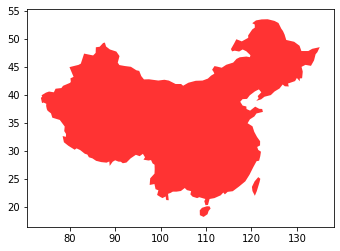

In [9]:
china.plot(color='red', alpha=0.8)

<AxesSubplot:>

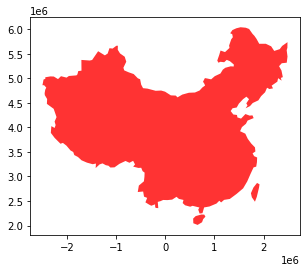

In [10]:
china.to_crs(crs='EPSG:2381').plot(color='red', alpha=0.8)

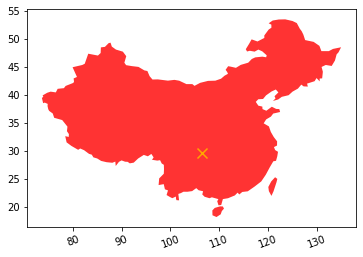

In [13]:
cq = gpd.GeoSeries([geometry.Point([106.561203, 29.558078])],
              crs='EPSG:4326')

fig, ax = plt.subplots()
china.to_crs(crs='EPSG:4326').plot(ax=ax, color='red', alpha=0.8)
cq.plot(ax=ax, color='orange', markersize=100, marker='x')
plt.xticks(rotation=20)
plt.show()

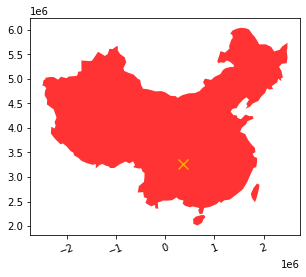

In [14]:
fig, ax = plt.subplots()
china.to_crs(crs='EPSG:2381').plot(ax=ax, color='red', alpha=0.8)
# 先再投影到EPSG:2381
cq.to_crs(crs='EPSG:2381').plot(ax=ax, color='orange', markersize=100, marker='x')
plt.xticks(rotation=20)
plt.show()

In [15]:
china.area.sum()

957.6785537419752

In [17]:
china.to_crs(crs='EPSG:2381').area.sum()

9842157826228.896